In [1]:
import sys
sys.path
!{sys.executable} -m pip install numpy

In [57]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm

In [3]:
# Data Wrangling and Visualization 
# Dataset is already loaded below
data = pd.read_csv("train.csv")

data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [4]:
data.corr()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
id,1.000000,-0.016030,0.059679,-0.036814,-0.078409,-0.330155,0.292821,0.523565,0.025907,-0.161629
latitude,-0.016030,1.000000,0.049337,0.009657,0.010614,0.006295,0.039400,-0.009361,0.064103,-0.025119
longitude,0.059679,0.049337,1.000000,-0.136140,-0.074862,0.006381,0.059299,0.142912,-0.142529,0.119882
cost,-0.036814,0.009657,-0.136140,1.000000,0.052918,-0.074432,-0.126146,-0.049586,0.032185,0.147576
minimum_nights,-0.078409,0.010614,-0.074862,0.052918,1.000000,-0.088767,-0.133842,-0.018005,0.107893,0.173550
number_of_reviews,-0.330155,0.006295,0.006381,-0.074432,-0.088767,1.000000,0.529528,-0.161979,-0.112328,-0.191645
reviews_per_month,0.292821,0.039400,0.059299,-0.126146,-0.133842,0.529528,1.000000,0.194204,-0.134904,-0.250670
owner_id,0.523565,-0.009361,0.142912,-0.049586,-0.018005,-0.161979,0.194204,1.000000,0.074535,0.121234
owned_hotels,0.025907,0.064103,-0.142529,0.032185,0.107893,-0.112328,-0.134904,0.074535,1.000000,0.191906
yearly_availability,-0.161629,-0.025119,0.119882,0.147576,0.173550,-0.191645,-0.250670,0.121234,0.191906,1.000000


In [5]:
# Explore Columns
data.columns
nrows,ncols = data.shape

In [6]:
#Description 
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692463,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [7]:
#Checking for missing values and counting them
data.isnull().values.any()

True

In [8]:
data.isnull().sum()
reviewsMissing = data[['number_of_reviews','reviews_per_month']].values.reshape(nrows,2)

In [9]:
# handling the missing data in the reviews per month feature 
imp = IterativeImputer(max_iter = 10, random_state = 0)
imp.fit(reviewsMissing)
imputedReviews = np.round(imp.transform(reviewsMissing),decimals = 2)
data[['number_of_reviews','reviews_per_month']] = imputedReviews
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7.0,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238.0,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0.0,0.73,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0.0,0.73,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38.0,0.42,745069,3,1


In [10]:
# Handling Categorical Features 
enc = preprocessing.OrdinalEncoder()
#data['region'] = enc.fit_transform(data['region'].values.reshape(nrows,1))
data['accommodation_type'] = enc.fit_transform(data['accommodation_type'].values.reshape(nrows,1))
#data['region'].value_count()

# What I should have done is create a new feature for each region and assign a 1 or 0 to that id 
# whether it is in that region or not 
# This goes for the region specific types as well as the accommodation type



In [11]:
# This creates the dummy variables for the region so that a new feature is being added since it is not ordinal data 
dataTESTER = pd.get_dummies(data, columns=["region"])

In [12]:
data = dataTESTER
data.head()
data.describe()

,id,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2.870000e+03,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.00000,2870.000000
mean,26760.657143,40.731224,-73.950158,0.874913,195.943206,11.530314,16.315331,1.056808,7.202195e+07,8.411498,0.498606,0.027178,0.374564,0.464460,0.12892,0.004878
std,14140.930062,0.054942,0.049745,0.746805,406.184714,37.972339,32.481722,1.198496,8.076516e+07,27.105522,0.500085,0.162629,0.484095,0.498822,0.33517,0.069685
min,0.000000,40.507080,-74.242850,0.000000,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,15931.750000,40.692463,-73.984003,0.000000,75.000000,1.000000,1.000000,0.352500,7.388002e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,28946.500000,40.728250,-73.956720,1.000000,120.000000,3.000000,4.000000,0.730000,3.352708e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,38478.500000,40.762658,-73.934202,1.000000,200.000000,6.000000,16.000000,1.130000,1.207625e+08,3.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000
max,48893.000000,40.898730,-73.721730,2.000000,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [13]:
ind = data.drop(['yearly_availability'],axis = 1)
dep = data['yearly_availability']
ind.head()


,id,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island
0,13232,40.71854,-74.00439,0.0,170,5,7.0,0.56,929983,1,0,0,1,0,0
1,246,40.64446,-73.95030,0.0,65,3,238.0,2.30,281764,1,0,1,0,0,0
2,19091,40.78573,-73.81062,1.0,85,1,0.0,0.73,19923341,1,0,0,0,1,0
3,34305,40.73863,-73.98002,1.0,210,30,0.0,0.73,200380610,65,0,0,1,0,0
4,444,40.82426,-73.94630,2.0,75,3,38.0,0.42,745069,3,0,0,1,0,0


<AxesSubplot:>

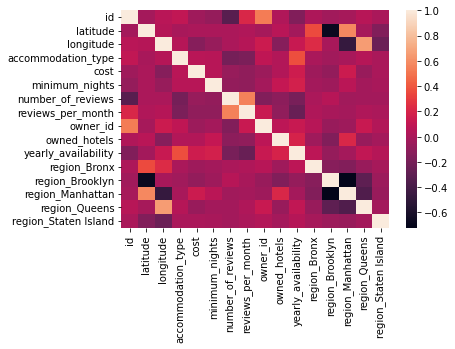

In [14]:
data.corr()
sns.heatmap(data.corr())

In [15]:
#sns.pairplot(data = data, diag_kind = 'kde')

In [44]:
X_train, X_test,y_train,y_test = train_test_split(ind,dep,test_size=0.4,random_state=0)

In [51]:
ml = LinearRegression()
clf_ml = ml.fit(X_train,y_train)
clf_ml.score(X_test,y_test)

0.3701233252104421

In [52]:
mlr = LogisticRegression(solver='lbfgs',multi_class='ovr',dual=False)
clf_lr = mlr.fit(X_train,y_train)
clf_lr.score(X_test,y_test)

0.5757839721254355

In [ ]:
clf = MLPClassifier()
clf.fit(X_train,y_train).score(X_test,y_test)

In [ ]:
clf_smv = svm.SVC(kernel='linear',C=1).fit(X_train,y_train)
clf_smv.score(X_test,y_test)

In [19]:
mlpR = MLPRegressor()
mlpR.fit(ind,dep)

C:\Users\dcaos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [20]:
checkLog = mlr.predict(ind)
r2_score(dep,checkLog)

-0.6919992094051644

In [47]:
check = ml.predict(ind)
r2_score(dep,check)

0.3369509191242026

In [22]:
checkMLrounded = np.round(check)
r2_score(dep,checkMLrounded)

0.1205506580439385

In [23]:
checkNN = clf.predict(ind)
r2_score(dep,checkNN)

-0.8940913719782688

In [24]:
checkMLPR = mlpR.predict(ind)
r2_score(dep,checkMLPR)

-4642322.10023948

In [25]:
mean_absolute_error(dep, check)

0.3457848919504889

In [26]:
mean_absolute_error(dep,checkLog)

0.4229965156794425

In [27]:
mean_absolute_error(dep, checkMLrounded)

0.21986062717770036

In [28]:
mean_absolute_error(dep, checkNN)

0.4735191637630662

In [29]:
mean_absolute_error(dep, checkMLPR)

759.4640808399178

In [30]:
#print(ind.ndim)
#len(ind)
#for i in range(200):
    #print(dep[i])
    
# Based on the results I think multi linear regresssion with rounding afterwards 

In [31]:
cnf_matrix = metrics.confusion_matrix(dep, checkLog)
cnf_matrix

array([[1048,  391],
       [ 823,  608]], dtype=int64)

In [37]:
def data_wrangle(data):
    nrows, ncols = data.shape
    reviewsMissing = data[['number_of_reviews','reviews_per_month']].values.reshape(nrows,2)
    imp = IterativeImputer(max_iter=10,random_state=0)
    imp.fit(reviewsMissing)
    imputedReviews = np.round(imp.transform(reviewsMissing),decimals=2)
    data[['number_of_reviews','reviews_per_month']]=imputedReviews
    enc = preprocessing.OrdinalEncoder()
    data = pd.get_dummies(data,columns=['region'])
            
    #data['region'] = enc.fit_transform(data['region'].values.reshape(nrows,1))
    data['accommodation_type'] = enc.fit_transform(data['accommodation_type'].values.reshape(nrows,1))
    ind = data.values
    return ind

In [33]:
# Visualization, Modeling, Machine Learning

# Loading Test data
test_data = pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [38]:
indTest = data_wrangle(test_data)
print(indTest.ndim)
len(indTest)
indTest

2


array([[ 1.921500e+04,  4.070912e+01, -7.394513e+01, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 3.630100e+04,  4.057646e+01, -7.396641e+01, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 4.056600e+04,  4.076616e+01, -7.398228e+01, ...,  1.000000e+00,
         0.000000e+00,  0.000000e+00],
       ...,
       [ 3.138300e+04,  4.071390e+01, -7.399120e+01, ...,  1.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 4.713500e+04,  4.074399e+01, -7.397204e+01, ...,  1.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 1.315400e+04,  4.070749e+01, -7.401413e+01, ...,  1.000000e+00,
         0.000000e+00,  0.000000e+00]])

In [39]:
# predict on the test set
depPred = ml.predict(indTest)

In [ ]:
# Metrics
